# Übung
### Ziel: Einführung in die gängigsten Bewertungsmetriken und erste Hands-On Erfahrungen sammeln
### Datensatz: Breast Cancer-Datensatz - aufbereitet und bereitgestellt von SciKit-Learn

In [17]:
import pandas as pd
from sklearn import datasets
import numpy as np

### Lade den Datensatz

In [18]:
dataX = datasets.load_breast_cancer()
dataY = dataX.target

In [19]:
names = dataX.feature_names
columns = list(names)
row = list(dataX.data[0])

In [20]:
test_df = pd.DataFrame([row], columns=columns)
for i in range(len(dataX.data)-1):
    test_df.loc[i+1] = list(dataX.data[i+1])
test_df["Target"] = dataX.target

In [21]:
test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Infos über den Datensatz
1. 596 Instanzen
2. Keine MissingValues
3. 2 Klassen
4. Target(0)=Maligne, Target(1)=Benigne
5. Es gibt 30 Merkmale

#### Verteilung der Daten (Klassen)

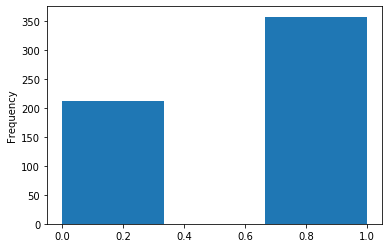

In [22]:
test_df["Target"].plot.hist(bins=3)

#### Beginne mit Datenaufbereitung
1. Train_test_split
2. Anwendung eines DecisionTreeClassifiers
3. Anwendung einer logistischen Regression

In [23]:
from sklearn.model_selection import train_test_split
Y = test_df.Target
X = test_df[list(names)]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=30)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Trainiere ein Modell
logreg = LogisticRegression()
logreg.fit(X_train.values, y_train.values)
y_hat_logreg = logreg.predict(X_test.values)
y_hat_logreg2 = logreg.predict_proba(X_test.values)[:,1]


clf = DecisionTreeClassifier()
clf.fit(X_train.values, y_train.values)
y_hat = clf.predict(X_test.values)
y_hat_proba = clf.predict_proba(X_test.values)[:,1]

### Füge das Ergebnis in ein Dataframe zusammen

In [25]:
row2 = list(X_test.values[0])
test_df2 = pd.DataFrame([row2], columns=columns)
for i in range(len(X_test.values)-1):
    test_df2.loc[i+1] = list(X_test.values[i+1])
test_df2["Target_test"] = y_test.values
test_df2["Prediction_Tree"] = y_hat
test_df2["Prediction_Tree2"] = y_hat_proba
test_df2["Prediction_LogReg"] = y_hat_logreg
test_df2["Prediction_LogReg2"] = y_hat_logreg2

In [29]:
test_df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target_test,Prediction_Tree,Prediction_Tree2,Prediction_LogReg,Prediction_LogReg2
0,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,0.1963,0.2535,0.09181,0.2369,0.06558,0,0,0.0,0,6.908434e-03
1,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,0.5046,0.6872,0.21350,0.4245,0.10500,0,0,0.0,0,1.268986e-01
2,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,0.1402,0.1055,0.06499,0.2894,0.07664,1,1,1.0,1,9.942220e-01
3,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,0.4166,0.5006,0.20880,0.3900,0.11790,0,0,0.0,0,2.874931e-01
4,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,0.3898,0.3365,0.07966,0.2581,0.10800,1,1,1.0,1,9.973387e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,0.1026,0.1181,0.06736,0.2883,0.07748,1,1,1.0,1,9.940001e-01
184,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,0.2117,0.3446,0.14900,0.2341,0.07421,0,0,0.0,0,2.342178e-05
185,14.95,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,...,0.2521,0.2500,0.08405,0.2852,0.09218,1,1,1.0,1,9.235735e-01
186,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,...,0.2297,0.2623,0.13250,0.3021,0.07987,0,0,0.0,0,5.361724e-05


Lese den vorbereiteten Datensatz ein. (Prepared_DataSet1.csv)

In [32]:
curr_df = pd.read_csv("Prepared_DataSet1.csv", usecols=range(1, 36))

# Bewertungsmetriken
1. Accuracy
2. Confusion Matrix
3. ROC
4. Log Loss
5. Kohens Kappa

### 1. Accuracy
Übung: Verwende die Funktion accuracy_score().

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [33]:
# Ausblenden
from sklearn.metrics import accuracy_score
accuracy_score(curr_df.Target_test, curr_df.Prediction_Tree)

0.9468085106382979

In [34]:
# Ausblenden
accuracy_score(curr_df.Target_test, curr_df.Prediction_LogReg)

0.925531914893617

### 2. Confusion Matrix
Übung: Verwende die Funktion confusion_matrix().

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [35]:
# Ausblenden
from sklearn.metrics import confusion_matrix
confusion_matrix(curr_df.Target_test, curr_df.Prediction_Tree)

array([[ 66,   6],
       [  4, 112]])

In [36]:
# Ausblenden
confusion_matrix(curr_df.Target_test, curr_df.Prediction_LogReg)

array([[ 63,   9],
       [  5, 111]])

### 3. ROC
Übung: Verwende die Funktion roc_auc_score()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(curr_df.Target_test, curr_df.Prediction_Tree2)

0.9410919540229885

Übung: Stelle die ROC Curve des zweiten Modells dar

Text(0.5, 1.0, 'ROC Curve')

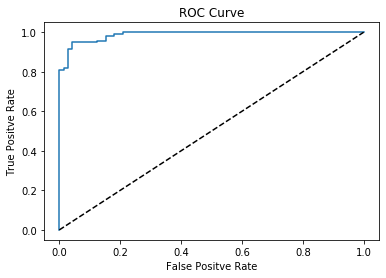

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, treshold = roc_curve(curr_df.Target_test, curr_df.Prediction_LogReg2)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('ROC Curve')

In [42]:
roc_auc_score(curr_df.Target_test, curr_df.Prediction_LogReg2)

0.9874281609195402

#### 4. Log Loss
- Ist im Prinzip eine Verlust-Funktion (LossFunction)
- Sie sagt aus, wie gut die vorhersagten Wahrscheinlichkeiten einer Klasse einer Instanz ist. Zum Beispiel wissen wir die Klasse einer Instanz und haben die Wahrscheinlichkeit (Wahrscheinlichkeit, ob die Instanz zu der Klasse gehört) berechnet. 
- Wertebereich zwischen 0 bis ∞
- Es gilt den Verlust minimal zu halten


Übung: Verwende die Funktion log_loss().

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss

In [39]:
# Ausblenden
from sklearn.metrics import log_loss
loss = log_loss(curr_df.Target_test, curr_df.Prediction_Tree2)
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Log Loss / Cross Entropy = 1.8372


In [40]:
loss = log_loss(curr_df.Target_test, curr_df.Prediction_LogReg2)
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Log Loss / Cross Entropy = 0.1445
